## Hello there, my name is Shane Holmes, this is the code used for my Muon Lab experiment. Utilizing this data, the goal is to use the scipy curve fit optimization function to determine the lifetime of a Muon. We applied two fits to two different data sets. The first dataset was collected Feb. 19 - 21st 2024 with the voltage threshold set to .32260 Volts. The second dataset was collected Feb. 21 - 26 2024 with the voltage threshold adjusted to .280 Volts. For context, the threshold voltage is used to achieve a muon decay rate that is similar to our calculated muon decay rate. The calculation done involves using the fact that the muon flux at sea level is approximately 1 muon per minute per squared centimeter. By measuring the diameter of our scintillator, we were able to then compute the cross sectional area of the scintillator and multiply it against the muon flux rate. As a result, we found that the muon decay rate is 3.47 muons per second. This calculation helped gauge which threshold should be used for the experiment. This gauging process is done by setting the threshold voltage, starting the experiment, and waiting a few moments to see whether the computer software reports a muon decay rate similar to our calculation. If the muon decay rate shown by the computer is not close to the calculated muon decay rate, the process is repeated until it is within range of the calculated muon decay rate. Following the end of experiments, the data was downloaded from the muon.exe software (the software used to collect data during the muon experiment). This data requires processing for it to useful to us. Therefore, the following steps in this notebook show how to process, plot, and fit the data. Feel free to follow along! 

## Here I list my libraries that was used for this data analysis. 

In [2]:
# importation of libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize as optimize

## Here you will see that ther are 3 data sets. This is because originally there were 3 datasets collected. Data 1 refers to the data collected Feb. 19 - 21 with the threshold voltage set at .32260 volts. Data 2 refers to the data collected Feb. 21 - 23 with the threshold set at .280 volts. Data 3 refers to the data collected Feb. 23 - 26 with the threshold also set at .280 volts. Since, we decided to just simply compare two datasets with each set at different threshold voltages we ended up combining data 2 and 3 because they shared the same threshold voltage. I just want to clarify this is why in the intro above we had a dataset for a combined 5 day period, because of this combining of data 2 and 3. 

In [3]:
data1 = np.loadtxt('MuonData_2-21-24.data')
data2 = np.loadtxt('MuonData_2-23-24.data')
data3 = np.loadtxt('MuonData_2-26-24.data')

### combine data2 and dat3 since they share the same voltage threshold
data23 = np.concatenate((data2,data3))

## The data file is retreived from a computer program called muon.exe. The file, once opened has two columns, one column represents the decay time of the muon while the second column represents timestamps in seconds. For the purpose of determining the lifetime of a muon we are only interested in the data that the computer reported as a muon decay. The computer counts from 0 to 40000 ns and if two electrical pulses are detected between this time it categorizes it as muon decay. Also, the time difference between the two electrical pulses is proportional to the time of a muon decay. This program down below exploits the fact that a muon decay occurs below 40000 ns. So, the program simply loops through the time differences in the first column and append values that are smaller than 40000 ns.  

In [4]:
def process(x):
    muon_decay_diff=[]
    for idx in range(0,len(x[:,1])-1):
        b_val = x[idx-1,0] # before current value 
        c_val = x[idx,0] # current value 
        a_val = x[idx+1,0] # after current value 
        if (b_val >= 40000 or None) and (c_val < 40000) and (a_val >= 40000 or None): 
            muon_decay_diff.append(c_val)
        else: 
            continue
    return muon_decay_diff

data_processed1 = process(data1)
data_processed2 = process(data2)
data_processed3 = process(data3)
data23_processed = process(data23)

## This is the fitted histogram for the Data collected between Feb. 19 - 21 2024 with Voltage Threshold set to .32260 Volts 

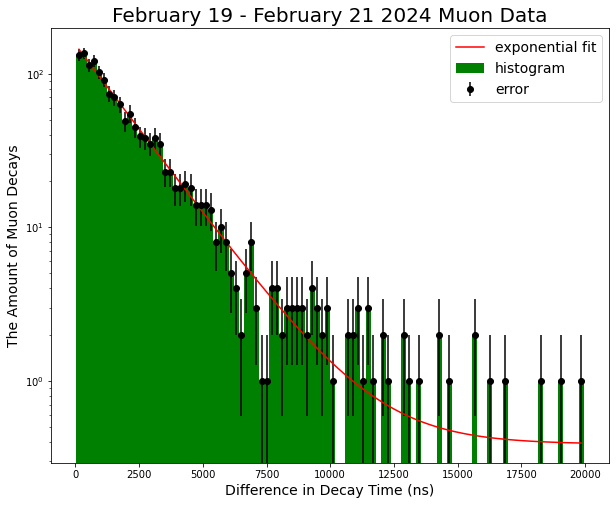

[1.54386481e+02 3.86971707e-01 1.96661145e+03]
[[ 1.90005753  0.11144536         nan]
 [ 0.11144536  0.36742299         nan]
 [        nan         nan 38.59018955]]


<ipython-input-24-d43a02a9ddbe>:33: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(paramErr1)) # Gaussian error


In [24]:
# Histogram plot for data1 

def exp_decay(t,A,B,T): 
    return (A * np.exp((-t/T))) + B # A is the number of particles left, B = background 

# Center bins to get same shape for x and y 
height, bins = np.histogram(data_processed1,bins = 100) # Tried this instead of plt.hist

bin_centers = (bins[1:] + bins[:-1])/2

cal_error = np.sqrt(height)
par1 = [200,1,2.2e3] # A, B, T 

# Scipy Optimize function 
paramfit1, paramErr1 = optimize.curve_fit(exp_decay,bin_centers,height,p0 = par1) 

# y-values for optimized fit 
optimized_fit1 = exp_decay(bin_centers,*paramfit1) 

plt.figure(figsize=(10,8))
plt.plot(bin_centers,optimized_fit1,color = 'r',label = 'exponential fit') 
plt.hist(data_processed1,bins= 100, label = 'histogram',color = 'g')
plt.errorbar(bin_centers,height,yerr = cal_error,ms = 6,color = 'k',marker = 'o',ls= ' ',label = 'error')
plt.yscale('log')
plt.ylabel('The Amount of Muon Decays',fontsize = 14)
plt.xlabel('Difference in Decay Time (ns)',fontsize = 14)
plt.title('February 19 - February 21 2024 Muon Data',fontsize = 20)
plt.legend(loc = 'upper right',fontsize = 14)
#plt.xlim([0,15000])
plt.savefig('February 19 - 21 2024 Muon Data.jpg')
plt.show()
print(paramfit1)
print(np.sqrt(paramErr1)) # Gaussian error

## In this fit of the histogram, it was found that the lifetime of a muon is $\tau = 1967 \pm 39 ns $ 

## Since this dataset contained beyond 10 datapoints, I applied the gaussian error formula to calculate the error bars per each datapoint. 

## To find the error of my parameters, I squared rooted the covariance matrix to obtain the standard errors of the fitted parameters. 

## I followed this strategy in the next histogram plot as well! 

## This is the fitted histogram for the Data collected between Feb. 21 - 26 2024 with the threshold voltage set to .280 Volts

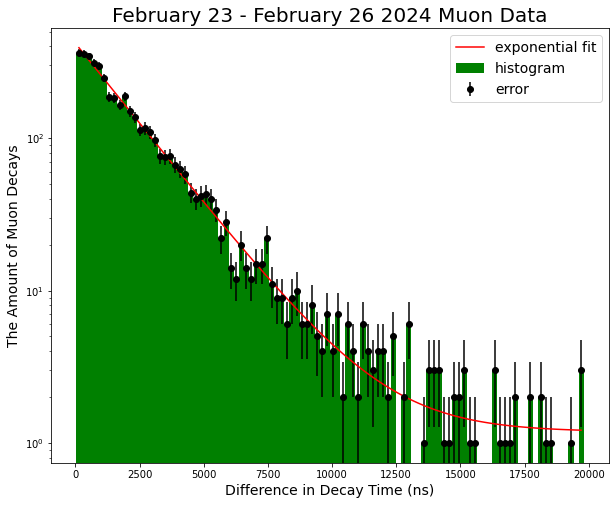

[4.18379721e+02 1.18442039e+00 2.06175493e+03]
[[ 4.94833644  0.29416454         nan]
 [ 0.29416454  1.00366412         nan]
 [        nan         nan 39.36753564]]


<ipython-input-6-a4e589a2544a>:29: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(paramErr4)) # Gaussian Error


In [6]:
# Center bins to get same shape for x and y 
height4, bins4 = np.histogram(data23_processed,bins = 100) # Tried this instead of plt.hist

bin_centers4 = (bins4[1:] + bins4[:-1])/2

par4 = [200,1,2.2e3] # A, B, T

cal_error4 = np.sqrt(height4)

# Scipy Optimize function 
paramfit4, paramErr4 = optimize.curve_fit(exp_decay,bin_centers4,height4,p0 = par4) 

# y-values for optimized fit 
optimized_fit4 = exp_decay(bin_centers4,*paramfit4) 

plt.figure(figsize=(10,8))
plt.plot(bin_centers4,optimized_fit4,color = 'r',label = 'exponential fit') 
plt.hist(data23_processed,bins= 100, label = 'histogram',color = 'g')
plt.errorbar(bin_centers4,height4,yerr = cal_error4,ms = 6,color = 'k',marker = 'o',ls= ' ',label = "error")
plt.yscale('log')
plt.ylabel('The Amount of Muon Decays',fontsize = 14)
plt.xlabel('Difference in Decay Time (ns)',fontsize = 14)
plt.title('February 23 - February 26 2024 Muon Data',fontsize = 20)
plt.legend(loc = 'upper right',fontsize = 14)
#plt.xlim(0,2500)
plt.savefig('February 21 - 26 2024 Muon Data.jpg')
plt.show()
print(paramfit4) 
print(np.sqrt(paramErr4)) # Gaussian Error 

## In this histogram, it was found that the lifetime of a Muon is $\tau = 2062 \pm 39 ns$ 